In [276]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
import xgboost as xgb

import shap

In [277]:
#!conda install -c conda-forge shap -y

In [278]:
data = pd.read_csv('data/heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [279]:
#data.columns = ['age','sex','chest_pain_type','resting_bp','cholestrol',
#                'fasting_blood_sugar','rest_ecg','max_heart_rate_achieved','exercise_induced_agnia',
#                'oldpeak','slope','major_vessels_ca','thal','target']

## Understanding the data

In [280]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [282]:
## finding correlation
#plt.figure(figsize=(14,7))

#heatmap = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
#heatmap.set_title('Correlation Map (heart disease)', pad=2, fontdict={'fontsize':12})

#plt.show()

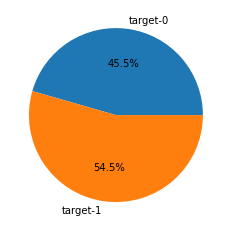

In [283]:
plt.pie(data.groupby("target").size(), labels=['target-0','target-1'], autopct='%1.1f%%')
plt.show()

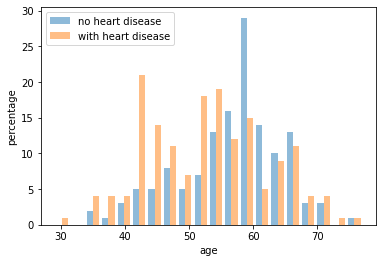

In [284]:
plt.hist([data[data.target==0].age, data[data.target==1].age], 
         bins = 20, alpha = 0.5, 
         label = ["no heart disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

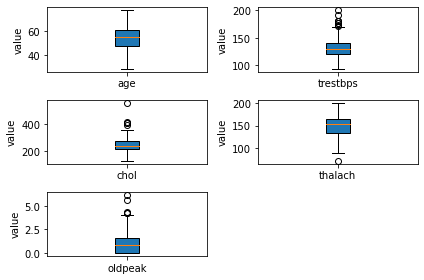

In [285]:
# finding the outliers in the data

continous_data = data[['age','trestbps','chol','thalach','oldpeak']]

for cols in continous_data.columns:
    plt.subplot(3,2,list(continous_data.columns).index(cols)+1)
    plt.boxplot(continous_data[cols], patch_artist=True, labels=[cols])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

In [286]:
continous_data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [287]:
## removing the outliers

df1 = data[data['trestbps'] < (data['trestbps'].mean() + data['trestbps'].std()*3)]
df2 = df1[df1['chol'] < (df1['chol'].mean() + df1['chol'].std()*3)]
df3 = df2[df2['thalach'] < (df2['thalach'].mean() + df2['thalach'].std()*3)]
df4 = df3[df3['oldpeak'] < (df3['oldpeak'].mean() + df3['oldpeak'].std()*3)]

data = df4.copy()

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,54.220339,0.694915,0.976271,131.020339,243.623729,0.145763,0.538983,149.620339,0.325424,0.986102,1.413559,0.708475,2.298305,0.552542
std,9.127345,0.461226,1.034825,16.791830,45.777606,0.353468,0.525867,22.917590,0.469329,1.074018,0.604816,1.011715,0.610980,0.498077
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [288]:
## handling categorical data

data_catg = data.copy()

data_catg['cp'] = data['cp'].map({0:"asymptomatic",1:"typical_angina",2:"atypical_angina",3:"non_anginal_pain"})
data_catg['sex'] = data['sex'].map({0:"female", 1:"male"}) 
data_catg['exang'] = data['exang'].map({0:"exercise_not_induce_angina", 1:"exercise_induced_angina"})
data_catg['slope'] = data['slope'].map({1:"upsloping", 2:"flat", 3:"downsloping"})
data_catg['thal'] = data['thal'].map({1:"normal",2:"fixed_defect", 3:"reversable_defect"})

df_new = pd.get_dummies(data_catg, drop_first = True)

df_new.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,sex_male,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina,exang_exercise_not_induce_angina,slope_upsloping,thal_normal,thal_reversable_defect
0,63,145,233,1,0,150,2.3,0,1,1,0,1,0,1,0,1,0
1,37,130,250,0,1,187,3.5,0,1,1,1,0,0,1,0,0,0
2,41,130,204,0,0,172,1.4,0,1,0,0,0,1,1,0,0,0
3,56,120,236,0,1,178,0.8,0,1,1,0,0,1,1,0,0,0
4,57,120,354,0,1,163,0.6,0,1,0,0,0,0,0,0,0,0


In [289]:
## trying to find the best features by running a dummy model

X = df_new.drop("target", 1).values
y = df_new["target"].astype("int").values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=32)

In [290]:
model = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

param = {
    'max_depth': [3,5,7,9], 
    'learning_rate':[0.001,0.01, 0.1, 0.3], 
    'n_estimators':[100,500]
}
cv = GridSearchCV(model, param_grid=param, cv=10, return_train_score=True)
cv

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample

In [291]:
cv.fit(X_train, y_train)
test_pred = cv.predict(X_test)
cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [292]:
max_depth_of_model = cv.best_estimator_.max_depth
best_learning_rate = cv.best_estimator_.learning_rate
best_estimator = cv.best_estimator_.n_estimators
best_reg_lambda = cv.best_estimator_.reg_lambda

model = XGBClassifier(max_depth=max_depth_of_model, 
                      learning_rate=best_learning_rate, 
                      n_estimators= best_estimator,
                      n_jobs=1)
model.fit(X_train, y_train)

yhat = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy_score(yhat,y_test)

[11:33:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8333333333333334

In [293]:
importances = model.feature_importances_
importances

array([0.03105447, 0.03304865, 0.02486977, 0.02595535, 0.02469368,
       0.03547989, 0.05558335, 0.11002094, 0.05896486, 0.08717839,
       0.07150134, 0.05771178, 0.05981417, 0.09361531, 0.        ,
       0.23050806], dtype=float32)

In [294]:
inducies = np.argsort(importances)[::-1]

feature_dict = dict()
for idx in inducies:
    feature_dict[list(df_new.drop("target",1).columns)[idx]] = float(importances[idx])
feature_dict

{'thal_reversable_defect': 0.23050805926322937,
 'ca': 0.1100209429860115,
 'slope_upsloping': 0.09361530840396881,
 'cp_atypical_angina': 0.08717839419841766,
 'cp_non_anginal_pain': 0.07150133699178696,
 'exang_exercise_not_induce_angina': 0.059814173728227615,
 'sex_male': 0.058964863419532776,
 'cp_typical_angina': 0.05771178379654884,
 'oldpeak': 0.055583350360393524,
 'thalach': 0.03547988831996918,
 'trestbps': 0.03304864838719368,
 'age': 0.031054465100169182,
 'fbs': 0.025955354794859886,
 'chol': 0.02486976608633995,
 'restecg': 0.024693679064512253,
 'thal_normal': 0.0}

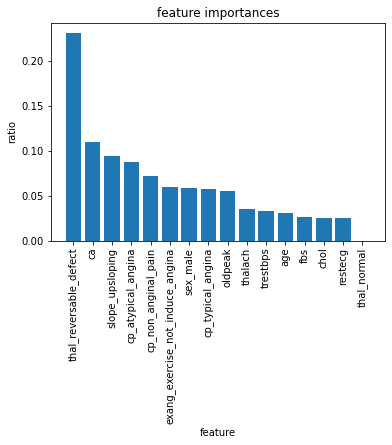

In [295]:
y_pos = np.arange(len(feature_dict.keys()))
plt.bar(y_pos, list(feature_dict.values()), align = "center")
plt.xticks(y_pos, list(feature_dict.keys()), rotation = 90)
plt.xlabel("feature")
plt.ylabel("ratio")
plt.title("feature importances")
plt.show()

In [296]:
tp,fn,fp,tn = confusion_matrix(y_test, yhat, labels=[1,0]).ravel()
tp,tn,fp,fn

(9, 16, 1, 4)

In [297]:
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

The precision rate is:  0.9
The recall rate is:  0.6923076923076923


In [298]:
feature_dict = dict(enumerate(df_new.drop("target", 1).columns))
feature_dict

{0: 'age',
 1: 'trestbps',
 2: 'chol',
 3: 'fbs',
 4: 'restecg',
 5: 'thalach',
 6: 'oldpeak',
 7: 'ca',
 8: 'sex_male',
 9: 'cp_atypical_angina',
 10: 'cp_non_anginal_pain',
 11: 'cp_typical_angina',
 12: 'exang_exercise_not_induce_angina',
 13: 'slope_upsloping',
 14: 'thal_normal',
 15: 'thal_reversable_defect'}

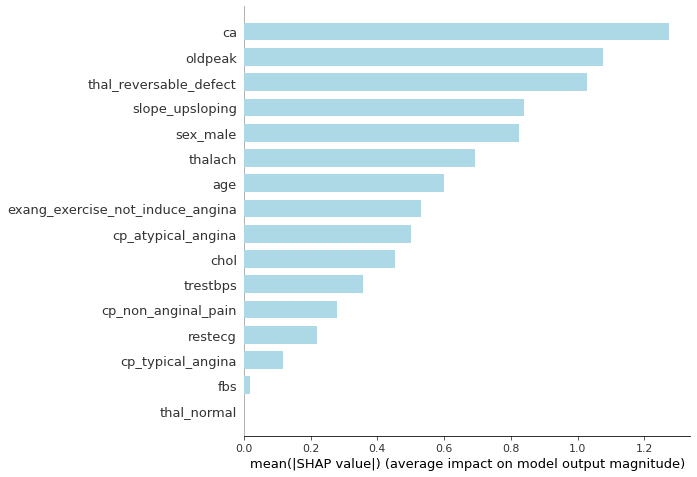

In [299]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names = list(feature_dict.values()), 
                  plot_type = "bar", 
                  color = "lightblue")

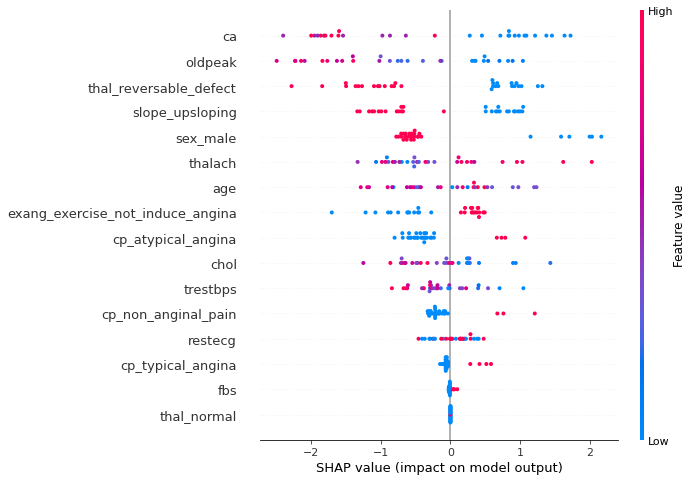

In [300]:
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()))

In [301]:
def shap_force_plot_of_data(model, dataset):
    explainer = shap.TreeExplainer(model)
    shap_value_for_sample = explainer.shap_values(dataset)
    shap.initjs()
    drivein_force = shap.force_plot(explainer.expected_value, shap_value_for_sample, dataset)
    return drivein_force

person_is_monitored = pd.DataFrame(X_test, columns = list(feature_dict.values()))
shap_force_plot_of_data(model, person_is_monitored[person_is_monitored["sex_male"]==1])

In [302]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [303]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Support Vector Machine Accuracy {:.2f}%".format(svm_model.score(X_test, y_test) * 100))

Support Vector Machine Accuracy 66.67%


In [304]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

print("Neural Network Accuracy {:.2f}%".format(nn_model.score(X_test, y_test) * 100))

Neural Network Accuracy 86.67%


In [305]:
#!conda install -c conda-forge tensorflow -y
#!conda install -c conda-forge keras -y

In [306]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout


model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', name='layer1'))
#model.add(Dropout(0.2))
model.add(layers.Dense(25, activation='relu', name='layer2'))
#model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu', name='layer3'))
model.add(layers.Dense(2, activation='sigmoid', name='f-layer'))

In [307]:
from tensorflow import keras 
model.compile(
      loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
      optimizer = keras.optimizers.Adam(lr = 0.001),
      metrics = ['accuracy']
)

In [308]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=2)

Epoch 1/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 2/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 3/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 4/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 5/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 6/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 7/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 8/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 9/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 10/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 11/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 12/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 13/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 14/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 15/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 16/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 17/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 18/100
265/265 - 0s - loss: 0.6931 - acc: 0.4340
Epoch 19/100
265/26

In [309]:
model.evaluate(X_test, y_test, batch_size=10, verbose=2)

30/30 - 0s - loss: 0.6931 - acc: 0.5667


[0.6931471824645996, 0.56666666]